In [61]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

# Задание 1
"С вашим датасетом нужно проделать примерно то же самое, что мы делали на лекции. Обратите внимание, что у вас может быть задача классификации, а мы решали задачу регрессии  (также можно посмотреть 19-02. Adult.ipynb, где решается задача классификации) (https://github.com/NikolaiZolotykh/MachineLearningCourse). Все должно быть выложено на ваш гит.
А именно:
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы"


# About Dataset
## Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In [68]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [69]:
rows, cols = data.shape
elements = rows*cols

print("elements: ", rows)

miss = data.isnull().sum().sum()
print(f'miss: {miss} ' + '(' + '{:.2f}'.format(miss / elements * 100) + '%)')

elements:  4803
miss: 3941 (4.10%)


In [70]:
print(list(data.columns.values))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [44]:
data['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [45]:
data['tagline']

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800                                                  NaN
4801                             A New Yorker in Shanghai
4802                                                  NaN
Name: tagline, Length: 4803, dtype: object

In [46]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


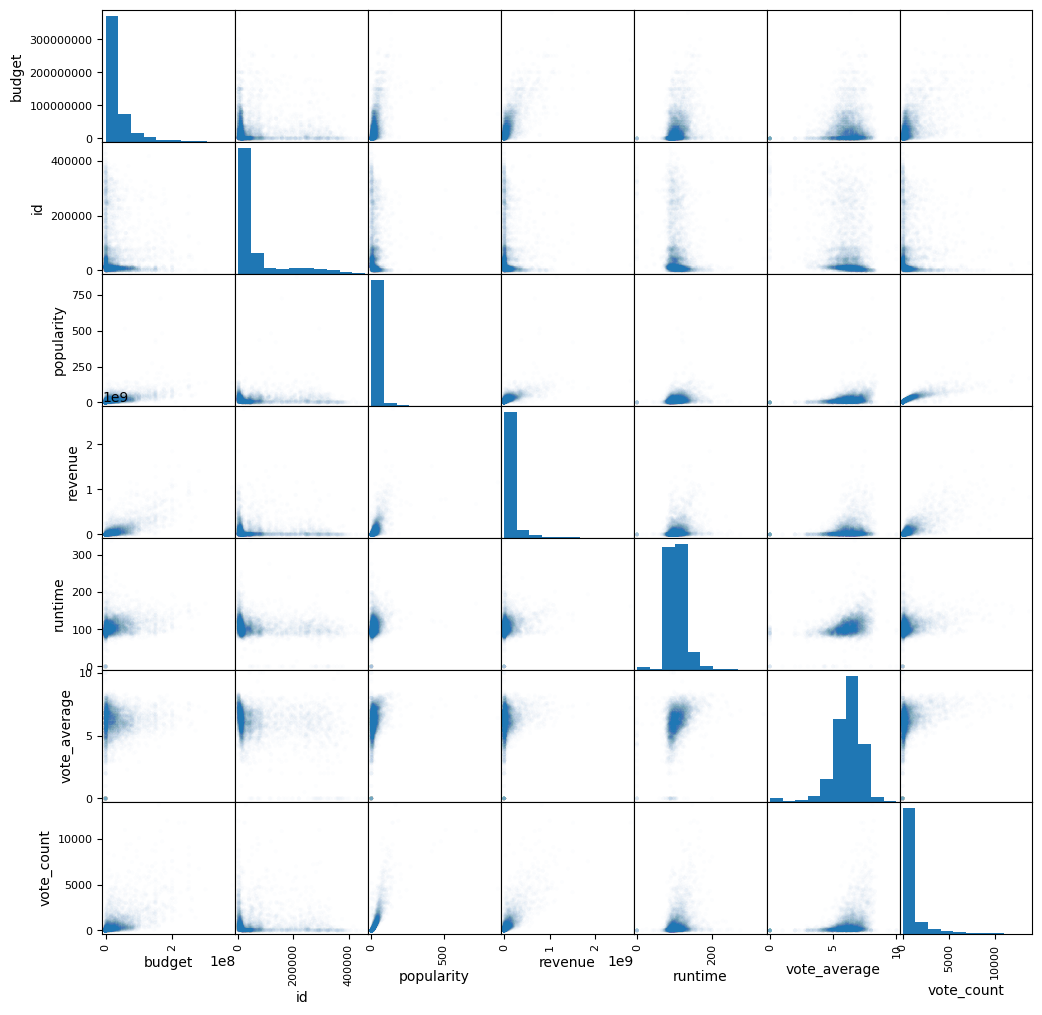

In [47]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (12,12))
pass

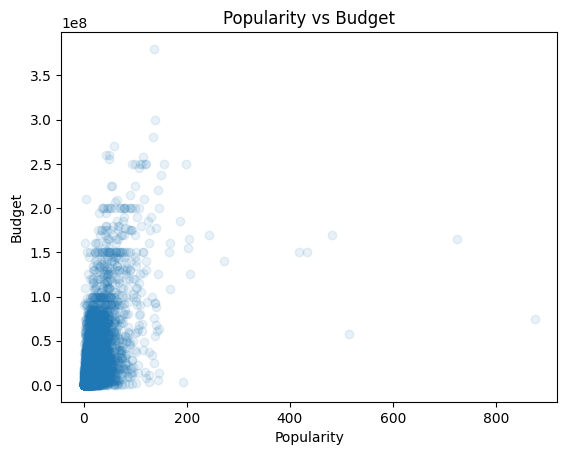

In [48]:
plt.plot(data['popularity'], data['budget'], 'o', alpha = 0.1)

plt.xlabel('Popularity')
plt.ylabel('Budget')

plt.title('Popularity vs Budget')
pass

In [50]:
#DODELAT drugie 2 priznaka

C:\Users\makar\AppData\Local\Temp\ipykernel_16100\224007510.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='magma')


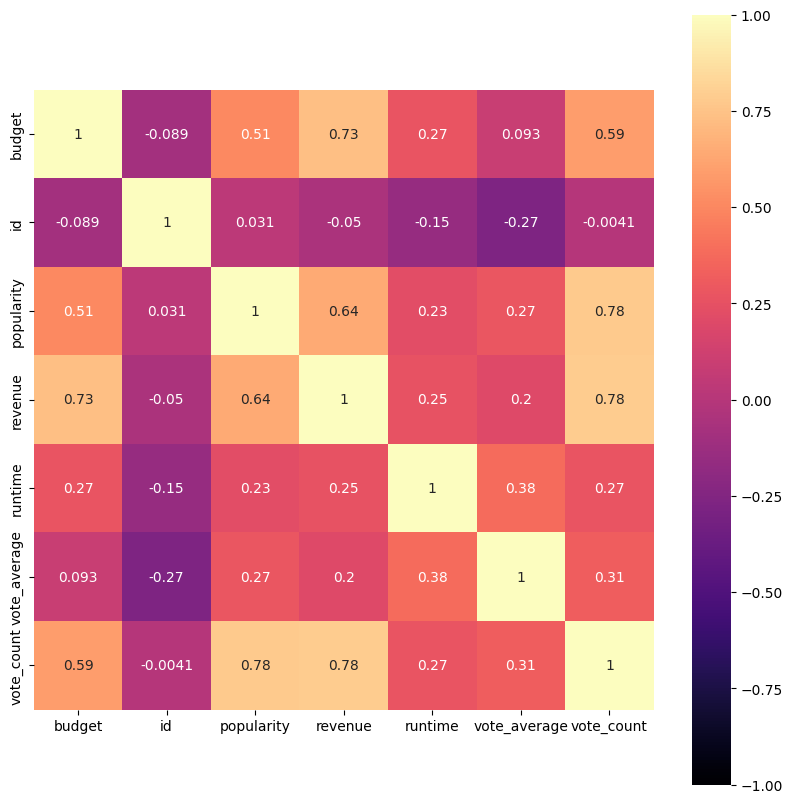

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='magma')
pass

In [52]:
numerical_cols = [el for el in data.columns if data[el].dtype.name != 'object']
numerical_cols

num_features_corr = data[numerical_cols].corr()
num_features_corr = np.triu(num_features_corr, k=1)
high_corr_indexes = np.where(abs(num_features_corr) > 0.5)
for i, j in zip(high_corr_indexes[0], high_corr_indexes[1]):
    print(f'Корреляция больше 0.5 по модулю между признаками: {numerical_cols[i]}, {numerical_cols[j]}')

Корреляция больше 0.5 по модулю между признаками: budget, popularity
Корреляция больше 0.5 по модулю между признаками: budget, revenue
Корреляция больше 0.5 по модулю между признаками: budget, vote_count
Корреляция больше 0.5 по модулю между признаками: popularity, revenue
Корреляция больше 0.5 по модулю между признаками: popularity, vote_count
Корреляция больше 0.5 по модулю между признаками: revenue, vote_count


C:\Users\makar\AppData\Local\Temp\ipykernel_16100\3888471638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

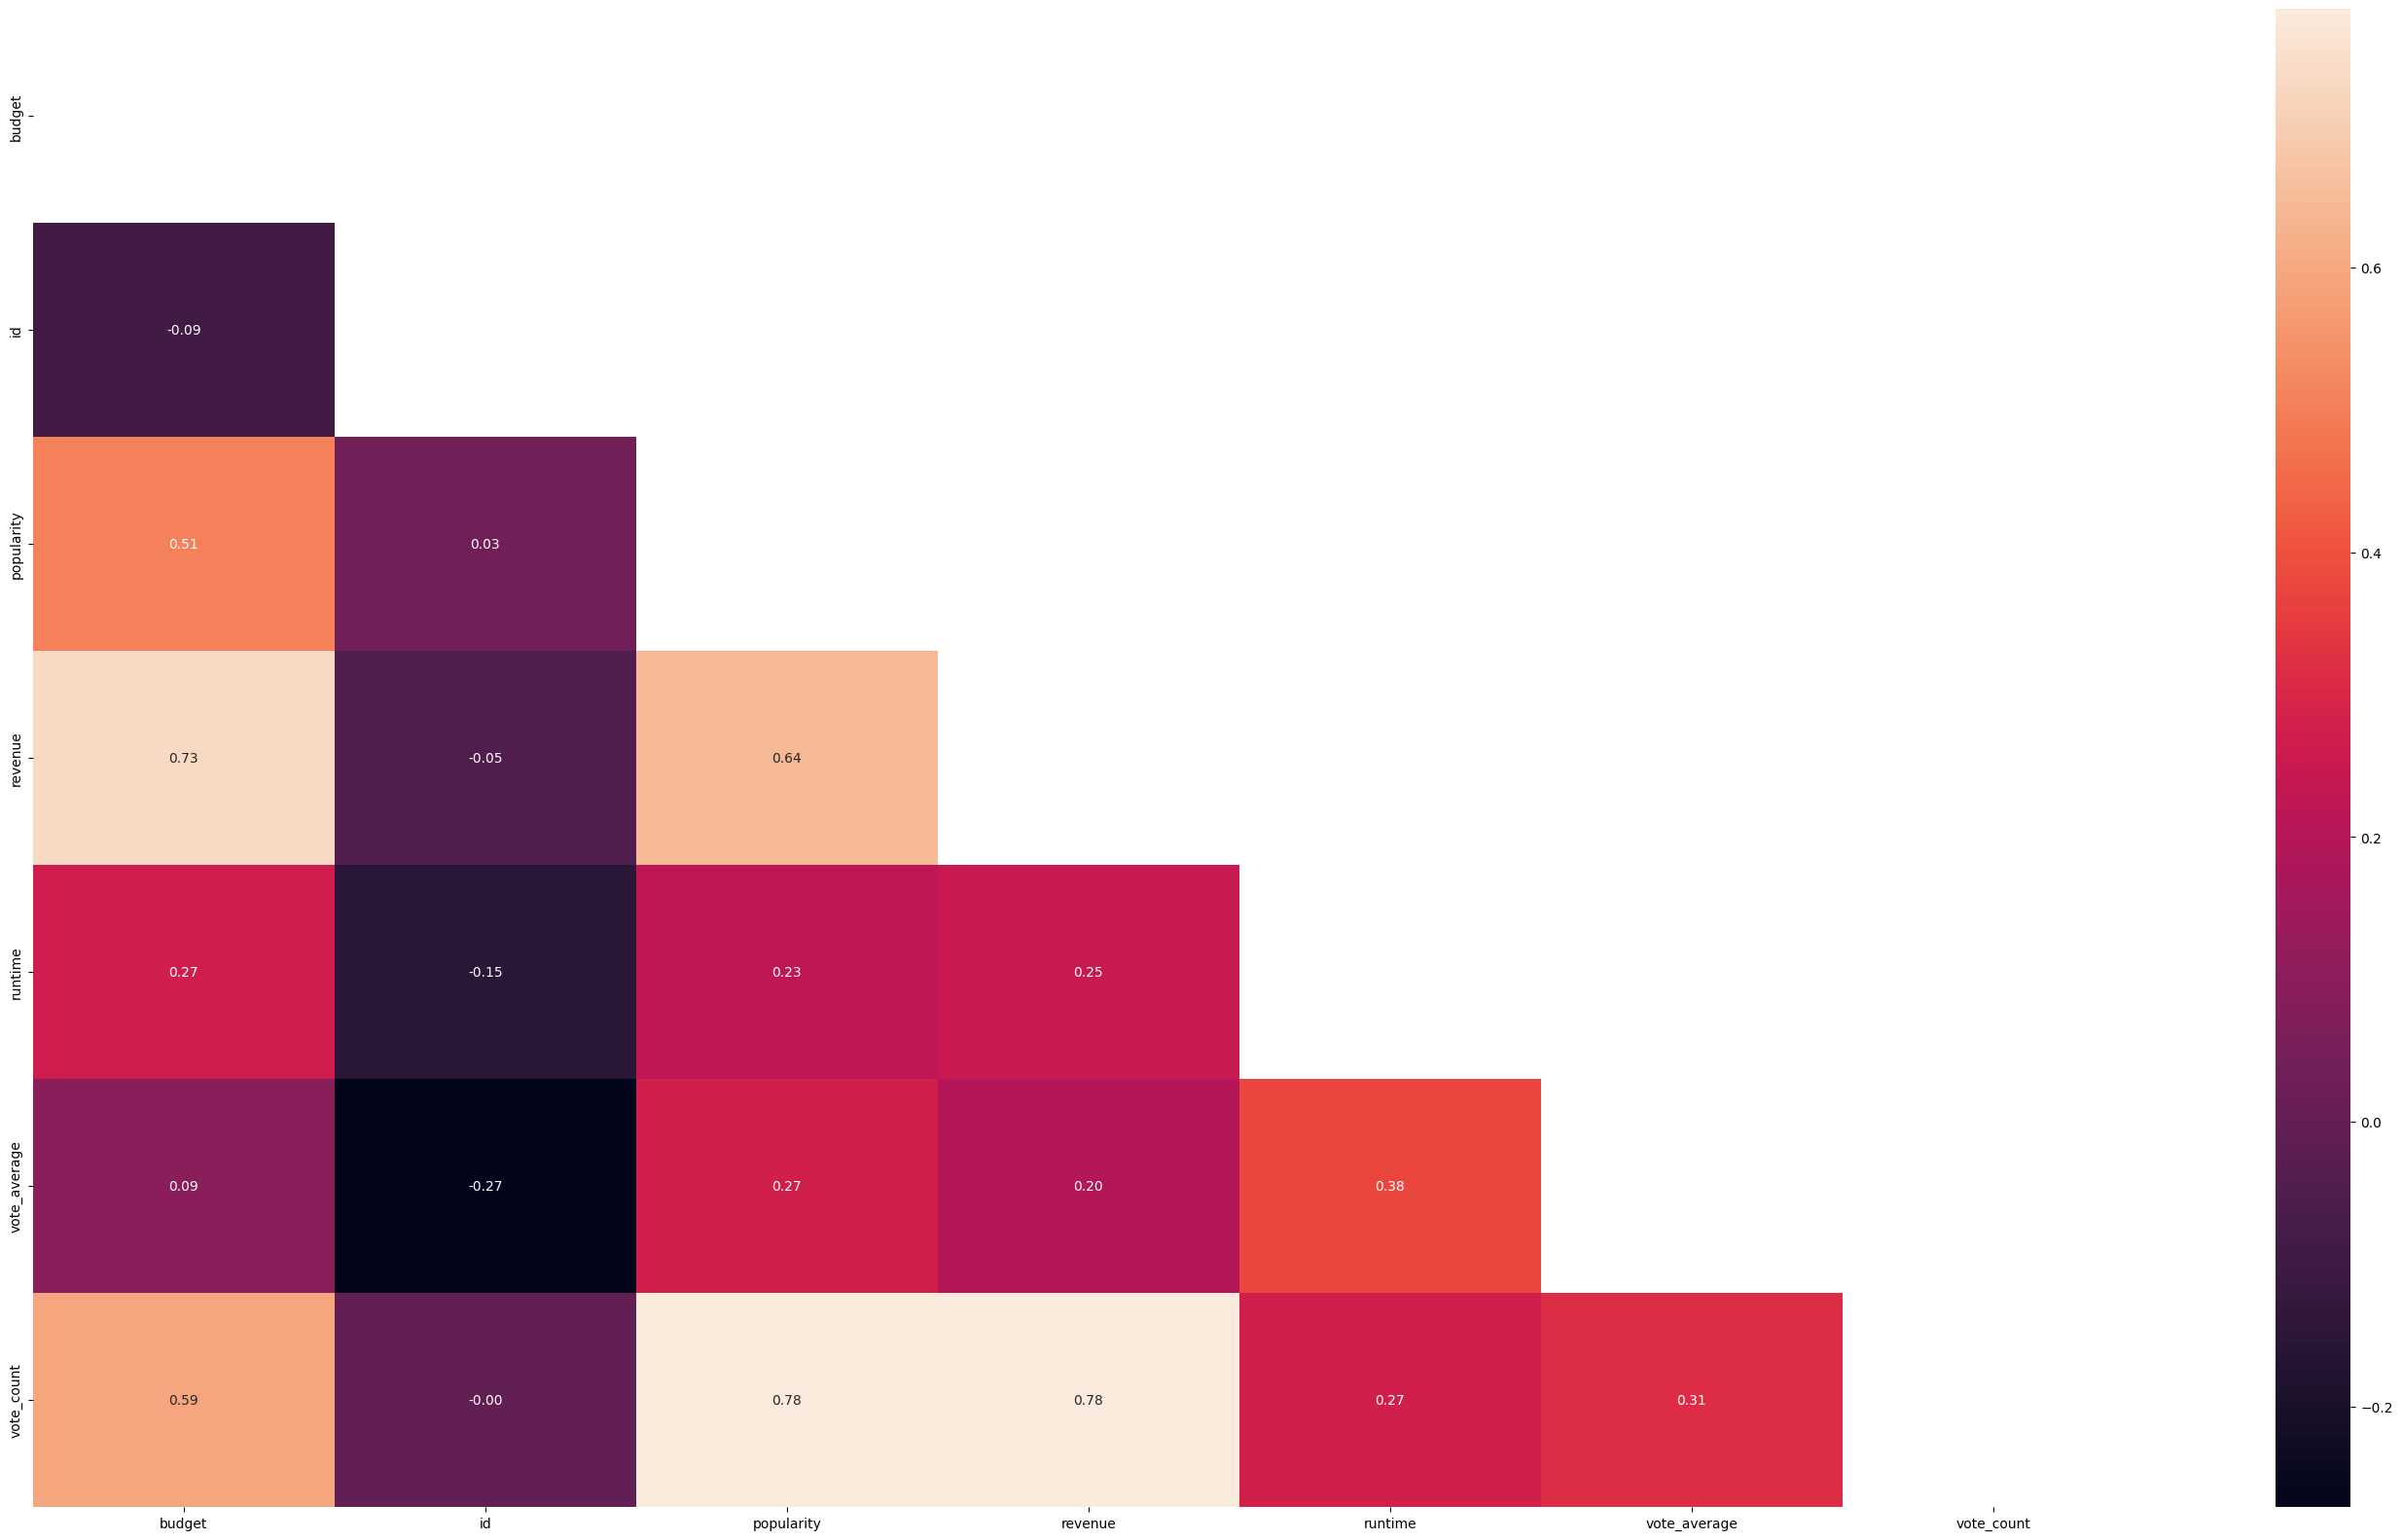

In [53]:
plt.figure(figsize=(35, 20))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f')

# Результаты
Исходя из графиков можно сделать вывод, что сериалы с меньшей популярностью имеют меньший бюджет.

In [71]:
data.isnull().sum()
lbls = ['homepage','id','genres','keywords','original_title','overview','production_companies','production_countries','tagline','spoken_languages','title']
data = data.drop(labels=lbls, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   original_language  4803 non-null   object 
 2   popularity         4803 non-null   float64
 3   release_date       4802 non-null   object 
 4   revenue            4803 non-null   int64  
 5   runtime            4801 non-null   float64
 6   status             4803 non-null   object 
 7   vote_average       4803 non-null   float64
 8   vote_count         4803 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 337.8+ KB


In [72]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [73]:
vals = {
    
    'budget': data.loc[:, 'budget'].mean(),
    'original_language' : 'en',
    'popularity' : data.loc[:, 'popularity'].mean(),
    'release_date' : '04.04.2004', 
    'revenue' : data.loc[:, 'revenue'].mean(),
    'runtime' : data.loc[:, 'runtime'].mean(),
    'status' : 'Unreleased',
    'vote_average' : data.loc[:, 'vote_average'].mean(),
    'vote_count' : data.loc[:, 'vote_count'].mean(),
    
    
}

data = data.fillna(value=vals)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   original_language  4803 non-null   object 
 2   popularity         4803 non-null   float64
 3   release_date       4803 non-null   object 
 4   revenue            4803 non-null   int64  
 5   runtime            4803 non-null   float64
 6   status             4803 non-null   object 
 7   vote_average       4803 non-null   float64
 8   vote_count         4803 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 337.8+ KB


In [74]:
categorical_cols = [el for el in data.columns if data[el].dtype.name == 'object']
numerical_cols = [el for el in data.columns if data[el].dtype.name != 'object']
binary_cols = [el for el in categorical_cols if data.describe(include=[object])[el]['unique'] == 2]

#binary_cols
#numerical_cols
categorical_cols

['original_language', 'release_date', 'status']

In [75]:
data.head(2)

,budget,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,en,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500


In [76]:
data['vote_average'] = np.round(data['vote_average'])
data['vote_average'].describe()

count    4803.000000
mean        6.089111
std         1.223627
min         0.000000
25%         6.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

In [77]:
data.head(10)

,budget,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,150.437577,2009-12-10,2787965087,162.0,Released,7.0,11800
1,300000000,en,139.082615,2007-05-19,961000000,169.0,Released,7.0,4500
2,245000000,en,107.376788,2015-10-26,880674609,148.0,Released,6.0,4466
3,250000000,en,112.312950,2012-07-16,1084939099,165.0,Released,8.0,9106
4,260000000,en,43.926995,2012-03-07,284139100,132.0,Released,6.0,2124
5,258000000,en,115.699814,2007-05-01,890871626,139.0,Released,6.0,3576
6,260000000,en,48.681969,2010-11-24,591794936,100.0,Released,7.0,3330
7,280000000,en,134.279229,2015-04-22,1405403694,141.0,Released,7.0,6767
8,250000000,en,98.885637,2009-07-07,933959197,153.0,Released,7.0,5293
9,250000000,en,155.790452,2016-03-23,873260194,151.0,Released,6.0,7004


In [79]:
cols = ['budget','popularity','revenue','runtime','vote_count']
d_num = data[cols]
d_num = (d_num - d_num.mean(axis = 0))/d_num.std(axis = 0)
d_num

,budget,popularity,revenue,runtime,vote_count
0,5.106649,4.052761,16.613979,2.438342,8.998792
1,6.653709,3.695874,5.395769,2.747977,3.085878
2,5.303101,2.699357,4.902543,1.819071,3.058339
3,5.425884,2.854501,6.156799,2.571043,6.816684
4,5.671449,0.705124,1.239605,1.111332,1.161347
...,...,...,...,...,...
4798,-0.707843,-0.227004,-0.492577,-1.144584,-0.366291
4799,-0.713024,-0.655309,-0.505109,-0.967649,-0.555018
4800,-0.713245,-0.630105,-0.505109,0.580529,-0.554208
4801,-0.713245,-0.648569,-0.505109,-0.392612,-0.553399


In [80]:
data = pd.concat((d_num, data["original_language"], data["release_date"],data["status"],data["vote_average"]), axis = 1)

In [81]:
data.head(10)

,budget,popularity,revenue,runtime,vote_count,original_language,release_date,status,vote_average
0,5.106649,4.052761,16.613979,2.438342,8.998792,en,2009-12-10,Released,7.0
1,6.653709,3.695874,5.395769,2.747977,3.085878,en,2007-05-19,Released,7.0
2,5.303101,2.699357,4.902543,1.819071,3.058339,en,2015-10-26,Released,6.0
3,5.425884,2.854501,6.156799,2.571043,6.816684,en,2012-07-16,Released,8.0
4,5.671449,0.705124,1.239605,1.111332,1.161347,en,2012-03-07,Released,6.0
5,5.622336,2.960950,4.965156,1.420968,2.337449,en,2007-05-01,Released,6.0
6,5.671449,0.854574,3.128720,-0.304144,2.138192,en,2010-11-24,Released,7.0
7,6.162579,3.544903,8.124565,1.509435,4.922122,en,2015-04-22,Released,7.0
8,5.425884,2.432479,5.229729,2.040239,3.728199,en,2009-07-07,Released,7.0
9,5.425884,4.221002,4.857016,1.951772,5.114089,en,2016-03-23,Released,6.0


In [87]:

data = data.drop(labels=["original_language","release_date","status"], axis=1)

# Тестовая и обучающая выборки¶
Предскажем среднюю оценку

Подготовка датасета завершена, можно начинать обучение.

Для этого сначала выберем те признаки, которые хотим предсказывать и те, по которым хотим это делать.

In [88]:
X = data.drop('vote_average', axis = 1)
Y = data['vote_average']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=58)
print(f"X_train = {X_train.shape}  ",end='')
print(f"y_train = {y_train.shape}")
print(f"X_test  = {X_test.shape}  ",end='')
print(f"y_test  = {y_test.shape}")

X_train = (3602, 5)  y_train = (3602,)
X_test  = (1201, 5)  y_test  = (1201,)


# Обучение
k-ближайших соседей

In [102]:

from sklearn.neighbors import KNeighborsClassifier

kNN=KNeighborsClassifier(n_neighbors = 50)
kNN.fit(X_train, y_train)
pass



In [103]:
from sklearn.metrics import accuracy_score

y_pred = kNN.predict(X_train)
print(f"accuracy на обучающей выборке = {accuracy_score(y_train, y_pred)}")
print(f"accuracy на тестовой выборке = {accuracy_score(y_test, kNN.predict(X_test))}")

accuracy на обучающей выборке = 0.5327595780122154
accuracy на тестовой выборке = 0.4829308909242298


# Задание 2
"Обучить на ваших данных логистическую регрессию, RandomForest, полносвязную (неглубокую - скрытых 1-2 слоя) нейронную сеть. По крайней мере для одной из моделей найти оптимальные занчения гиперпарамтров и построить графики зависимости ошибки от них (например, для нейронных сетей от параметра alpha и от количества нейронов). Наблюдается ли переобучение/недообучение? Какой метод лучше? Обязательно изобразите confusion matrix! Все ли с ней хорошо? Если нет, то что можно сделать? Сделайте выводы.

Все надо делать в том же ноутбуке, в котором вы работали раньше.
У вас есть возможность подчистить все хвосты"

# SVC

In [105]:
classifiers_results=[]
classifiers_results.append(["kNN",0.5327595780122154])

from sklearn.svm import SVC


svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

train_err = np.mean(y_train!=svc.predict(X_train))
test_err = np.mean(y_test!=svc.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["SVC",test_err])

Ошибка на тренировочной выборке: 0.47279289283731263; Ошибка на тестовой выборке: 0.5004163197335554


# Decision Tree


In [106]:
from sklearn.tree import DecisionTreeClassifier


decision_tree= DecisionTreeClassifier(random_state=58)
decision_tree.fit(X_train,y_train)

train_err = np.mean(y_train!=decision_tree.predict(X_train))
test_err = np.mean(y_test!=decision_tree.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["DecisionTree",test_err])

Ошибка на тренировочной выборке: 0.0; Ошибка на тестовой выборке: 0.5878434637801832


# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier


random_forest=RandomForestClassifier(n_estimators=128)
random_forest.fit(X_train,y_train)

train_err = np.mean(y_train!=random_forest.predict(X_train))
test_err = np.mean(y_test!=random_forest.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["RandomForest",test_err])

Ошибка на тренировочной выборке: 0.0; Ошибка на тестовой выборке: 0.533721898417985


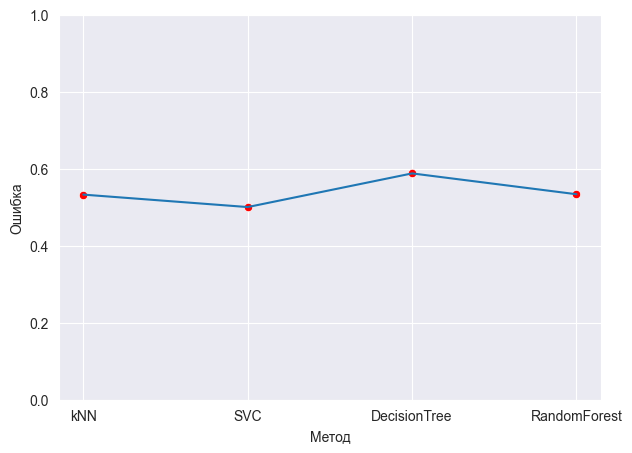

In [109]:
classifiers_names=[]
classifiers_err=[]
for elem in classifiers_results:
    classifiers_names.append(elem[0])
    classifiers_err.append(elem[1])
    
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.scatterplot(x=classifiers_names,y=classifiers_err,color='red')
sns.lineplot(x=classifiers_names,y=classifiers_err)
plt.ylim([0.,1.])
plt.xlabel("Метод")
plt.ylabel("Ошибка")
pass